In [3]:
import matplotlib.pyplot as plt
import numpy as np
import torch
from data import FaceDataset

In [2]:
def plot_tensor(tensor):
    """
    Plots images from a 4D tensor (batch, C, W, H) with 3 color channels.
    
    Args:
    tensor (numpy.ndarray): The 4D tensor to plot, with shape (batch, C, W, H).
    """
    if tensor.shape[1] != 3:
        raise ValueError("Tensor must have 3 channels")

    batch_size = tensor.shape[0]
    rows = (batch_size + 5) // 6  # Calculate the number of rows needed

    fig, axes = plt.subplots(rows, 6, figsize=(12, 2 * rows))
    fig.tight_layout(pad=1.0)

    # Flattening the axes array for easy iteration
    axes = axes.ravel()

    for i in range(batch_size):
        # Transpose tensor to shape (W, H, C) for plotting
        img = tensor[i].permute(1, 2, 0)
        axes[i].imshow(img)
        axes[i].axis('off')  # Turn off axis
    
    # Turn off axes for any unused subplots
    for j in range(i + 1, len(axes)):
        axes[j].axis('off')

    plt.show()

In [36]:
dataset = FaceDataset('norm_bounding_boxes.csv', '../celeba/img_align_celeba')
model = torch.load("boiNet.pt", map_location=torch.device('cpu'))

In [23]:
img = torch.stack([dataset[i][0] for i in range(12)])
face = torch.stack([dataset[i][1] for i in range(12)])
bbox = torch.stack([dataset[i][2] for i in range(12)])

In [33]:
fg_rec, bg_rec = model(img, face)
fg_rec = fg_rec.detach()
bg_rec = bg_rec.detach()

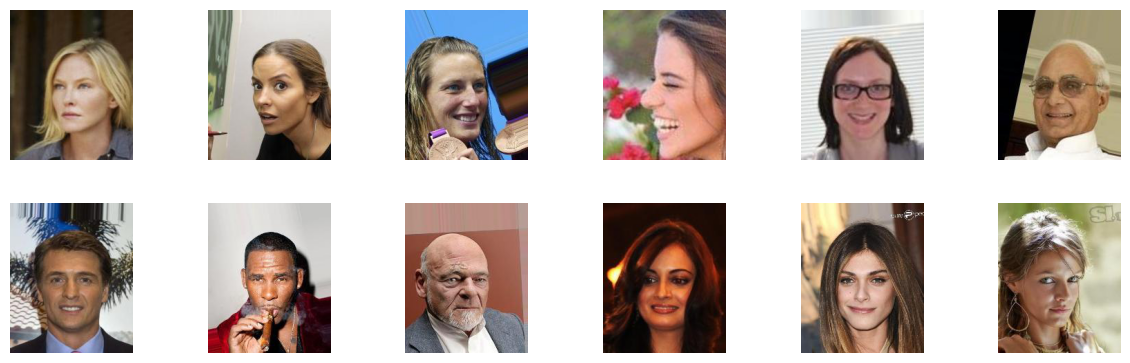

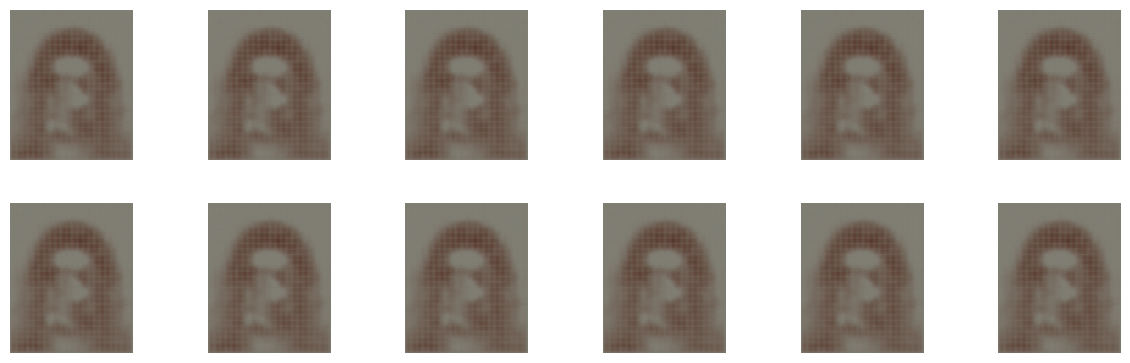

In [35]:
plot_tensor(img)
plot_tensor(bg_rec)
# plot_tensor(face)
# plot_tensor(fg_rec)